The first step is to load in the csv we created in the previous notebook. In the context of these two notebooks, this is a little redundent - we could have just continued on in one longer notebook. Splitting it into two makes the notebooks themselsevels shorter, and there's a good chance you will need to load a csv in a different notebook in the future. To test the data have loaded in properly, the typical appraoch is to use the `head()` function, which will print the first few rows of the dataframe. 

One thing to ntoe about matplotlib is that you work by adding components to a plot. The first is typically the plotitself with the data, but then you can add labels, titles, gridlines, etc. These "extras" are all added in seperate lines of code, and this makes each cell quite long. The combination of longer cells and large graphs in this notebook can might make it a little more difficult to navigate. 

In [27]:
## load ship_data.csv

import pandas
import numpy as np
import matplotlib.pyplot as plt

ship_data = pandas.read_csv('ship_data.csv', sep=',', header=0)

print(ship_data.head())

   Unnamed: 0    ship        id   title   startDate     endDate description  \
0           0  Acasta  C1496956  ACASTA  01/09/1918  31/10/1918     ACASTA.   
1           1  Acasta  C1496944  ACASTA  08/02/1915  09/04/1915     ACASTA.   
2           2  Acasta  C1496952  ACASTA  01/11/1917  02/02/1918     ACASTA.   
3           3  Acasta  C1496951  ACASTA  01/05/1917  01/07/1917     ACASTA.   
4           4  Acasta  C1480967  ACASTA  01/08/1913  30/09/1913     ACASTA.   

  reference  
0    ADM 53  
1    ADM 53  
2    ADM 53  
3    ADM 53  
4    ADM 53  


In [28]:
## map each ship name to a number and add it as a column 

ship_names = ship_data['ship'].unique()
ship_names.sort()
ship_names_map = dict(zip(ship_names, range(len(ship_names))))
ship_data['ship_num'] = ship_data['ship'].map(ship_names_map)

print(ship_data)


      Unnamed: 0    ship        id   title   startDate     endDate  \
0              0  Acasta  C1496956  ACASTA  01/09/1918  31/10/1918   
1              1  Acasta  C1496944  ACASTA  08/02/1915  09/04/1915   
2              2  Acasta  C1496952  ACASTA  01/11/1917  02/02/1918   
3              3  Acasta  C1496951  ACASTA  01/05/1917  01/07/1917   
4              4  Acasta  C1480967  ACASTA  01/08/1913  30/09/1913   
...          ...     ...       ...     ...         ...         ...   
1893        1893   Wolfe  C1589635   WOLFE  01/03/1948  31/03/1948   
1894        1894   Wolfe  C1589634   WOLFE  01/02/1948  28/02/1948   
1895        1895   Wolfe  C1588748   WOLFE  01/06/1947  30/06/1947   
1896        1896   Wolfe  C1587964   WOLFE  31/08/1946  30/09/1946   
1897        1897   Wolfe  C1587962   WOLFE  01/07/1946  31/07/1946   

     description reference  ship_num  
0        ACASTA.    ADM 53         0  
1        ACASTA.    ADM 53         0  
2        ACASTA.    ADM 53         0  
3  

for the main section of this notebook, we are going to use plotly to two graphs: a bar graph of cover dates for different record series, and a scatter graph of the description length vs start date, coloured by ship name. As there are a lot of ships, and thus even more records, we're going to limit to the first 10 ships to make the graphs more visible. 


/tmp/ipykernel_2129/1418749504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ship_data_10["startDate"] = pandas.to_datetime(ship_data_10["startDate"], dayfirst=True)
/tmp/ipykernel_2129/1418749504.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ship_data_10["endDate"] = pandas.to_datetime(ship_data_10["endDate"], dayfirst=True)
/tmp/ipykernel_2129/1418749504.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

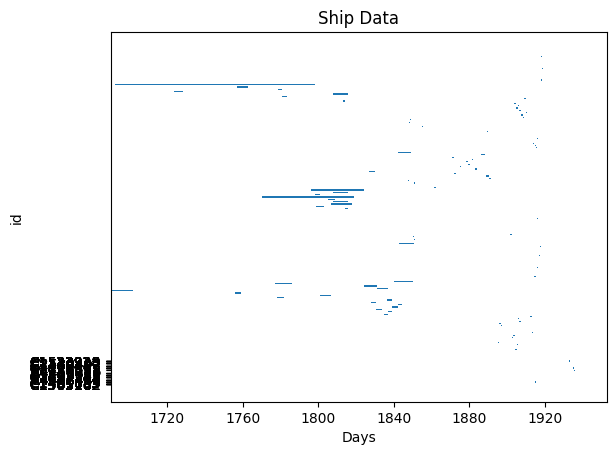

In [29]:
## isolate the data from the first 10 ships

ship_data_10 = ship_data[ship_data['ship_num'] < 11]

ship_data_10["startDate"] = pandas.to_datetime(ship_data_10["startDate"], dayfirst=True)
ship_data_10["endDate"] = pandas.to_datetime(ship_data_10["endDate"], dayfirst=True)
ship_data_10["duration"] = ship_data_10["endDate"] - ship_data_10["startDate"]

fig_basic, ax_basic = plt.subplots()

ax_basic.barh(ship_data_10['id'], ship_data_10['duration'], left=ship_data_10['startDate'], height=0.5)

ax_basic.set_yticks(ship_data_10['ship_num'])
ax_basic.set_yticklabels(ship_data_10['id'])
ax_basic.set_xlabel('Days')
ax_basic.set_ylabel('id')
ax_basic.set_title('Ship Data')

plt.show()

This first attempt looks a bit weird. We can improve this with a few tweaks. 

/tmp/ipykernel_2129/1322987334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ship_data_10['ship_color'] = ship_data_10['ship'].map(ship_colour_map)


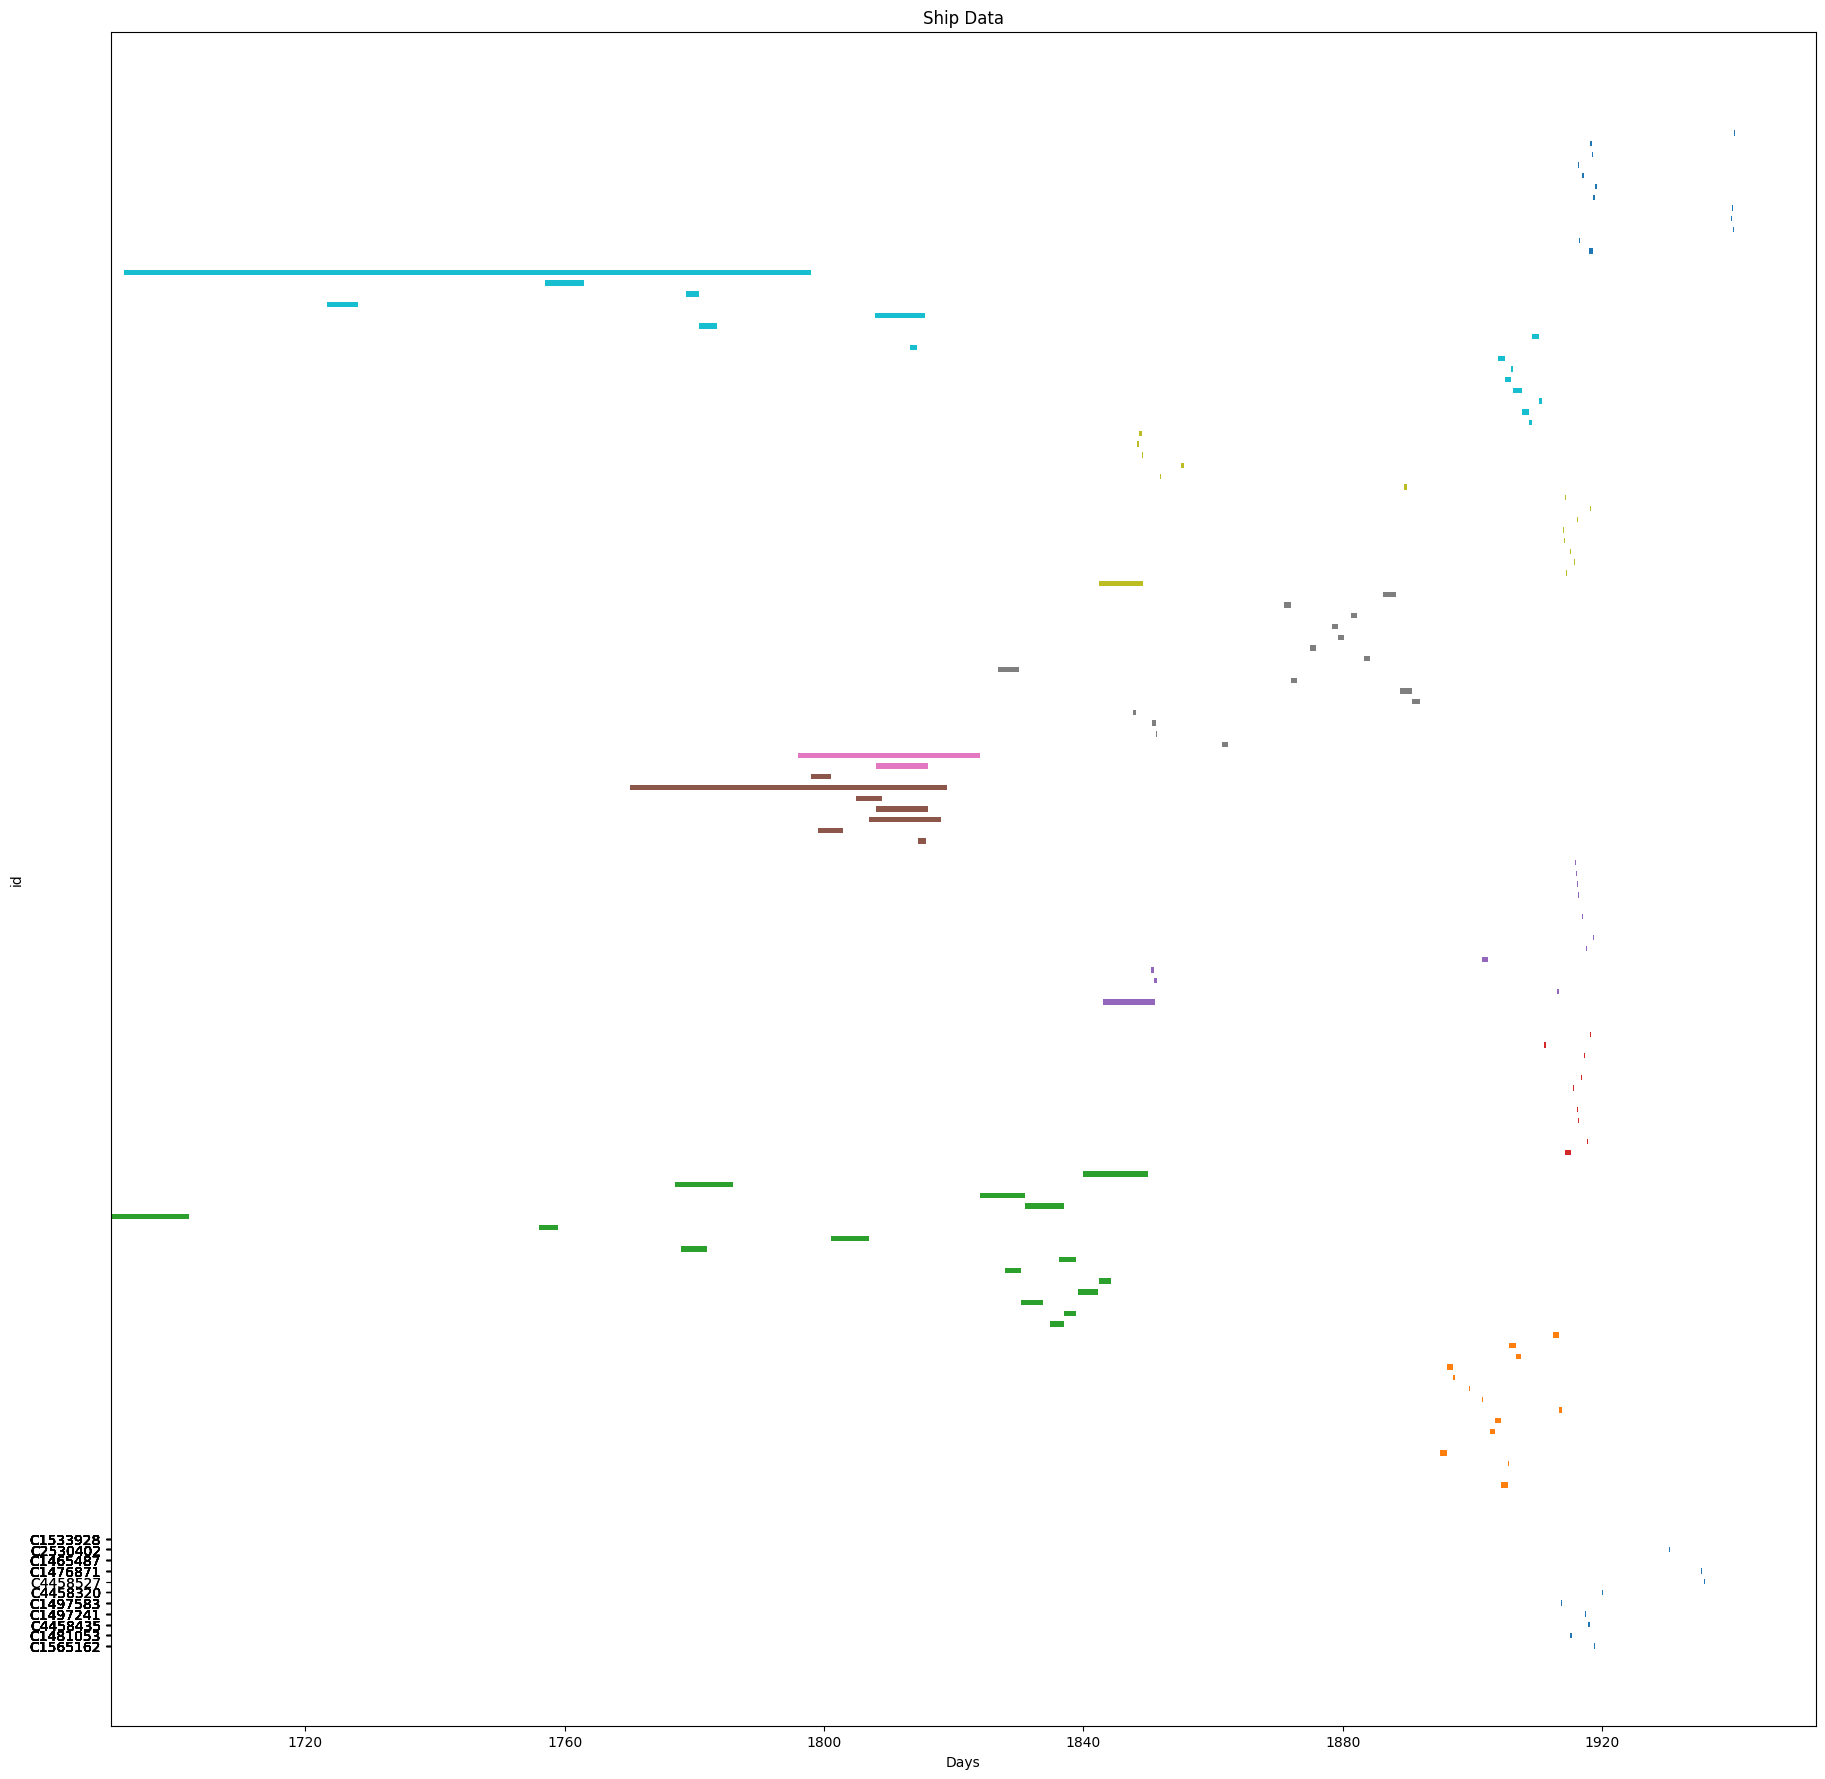

In [30]:
## map each ship name to a color and add it as a column

ship_colour_map = {}
for index, ship in enumerate(ship_names):
    ship_colour_map[ship] = f"C{index}"

ship_data_10['ship_color'] = ship_data_10['ship'].map(ship_colour_map)

fig_improved_1, ax_improved_1 = plt.subplots(figsize=(22, 22))

ax_improved_1.barh(ship_data_10['id'], ship_data_10['duration'], left=ship_data_10['startDate'], height=0.5, color=ship_data_10['ship_color'])

ax_improved_1.set_yticks(ship_data_10['ship_num'])
ax_improved_1.set_yticklabels(ship_data_10['id'])
ax_improved_1.set_xlabel('Days')
ax_improved_1.set_ylabel('id')
ax_improved_1.set_title('Ship Data')

plt.show()

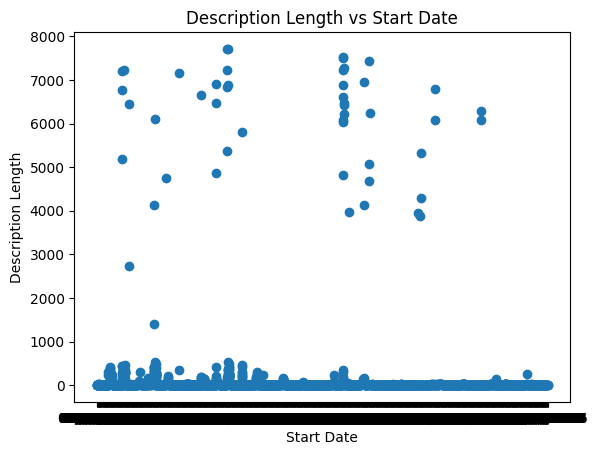

In [31]:
ship_data_description_set = ship_data

ship_data_description_set["description_length"] = ship_data_description_set["description"].str.len()

fig_scatter, ax_scatter = plt.subplots()

ax_scatter.scatter(ship_data_description_set["startDate"], ship_data_description_set["description_length"])

ax_scatter.set_xlabel('Start Date')
ax_scatter.set_ylabel('Description Length')
ax_scatter.set_title('Description Length vs Start Date')

plt.show()

So far, so meaningless. Let's try to make this a bit more useful by colouring the points by record series.

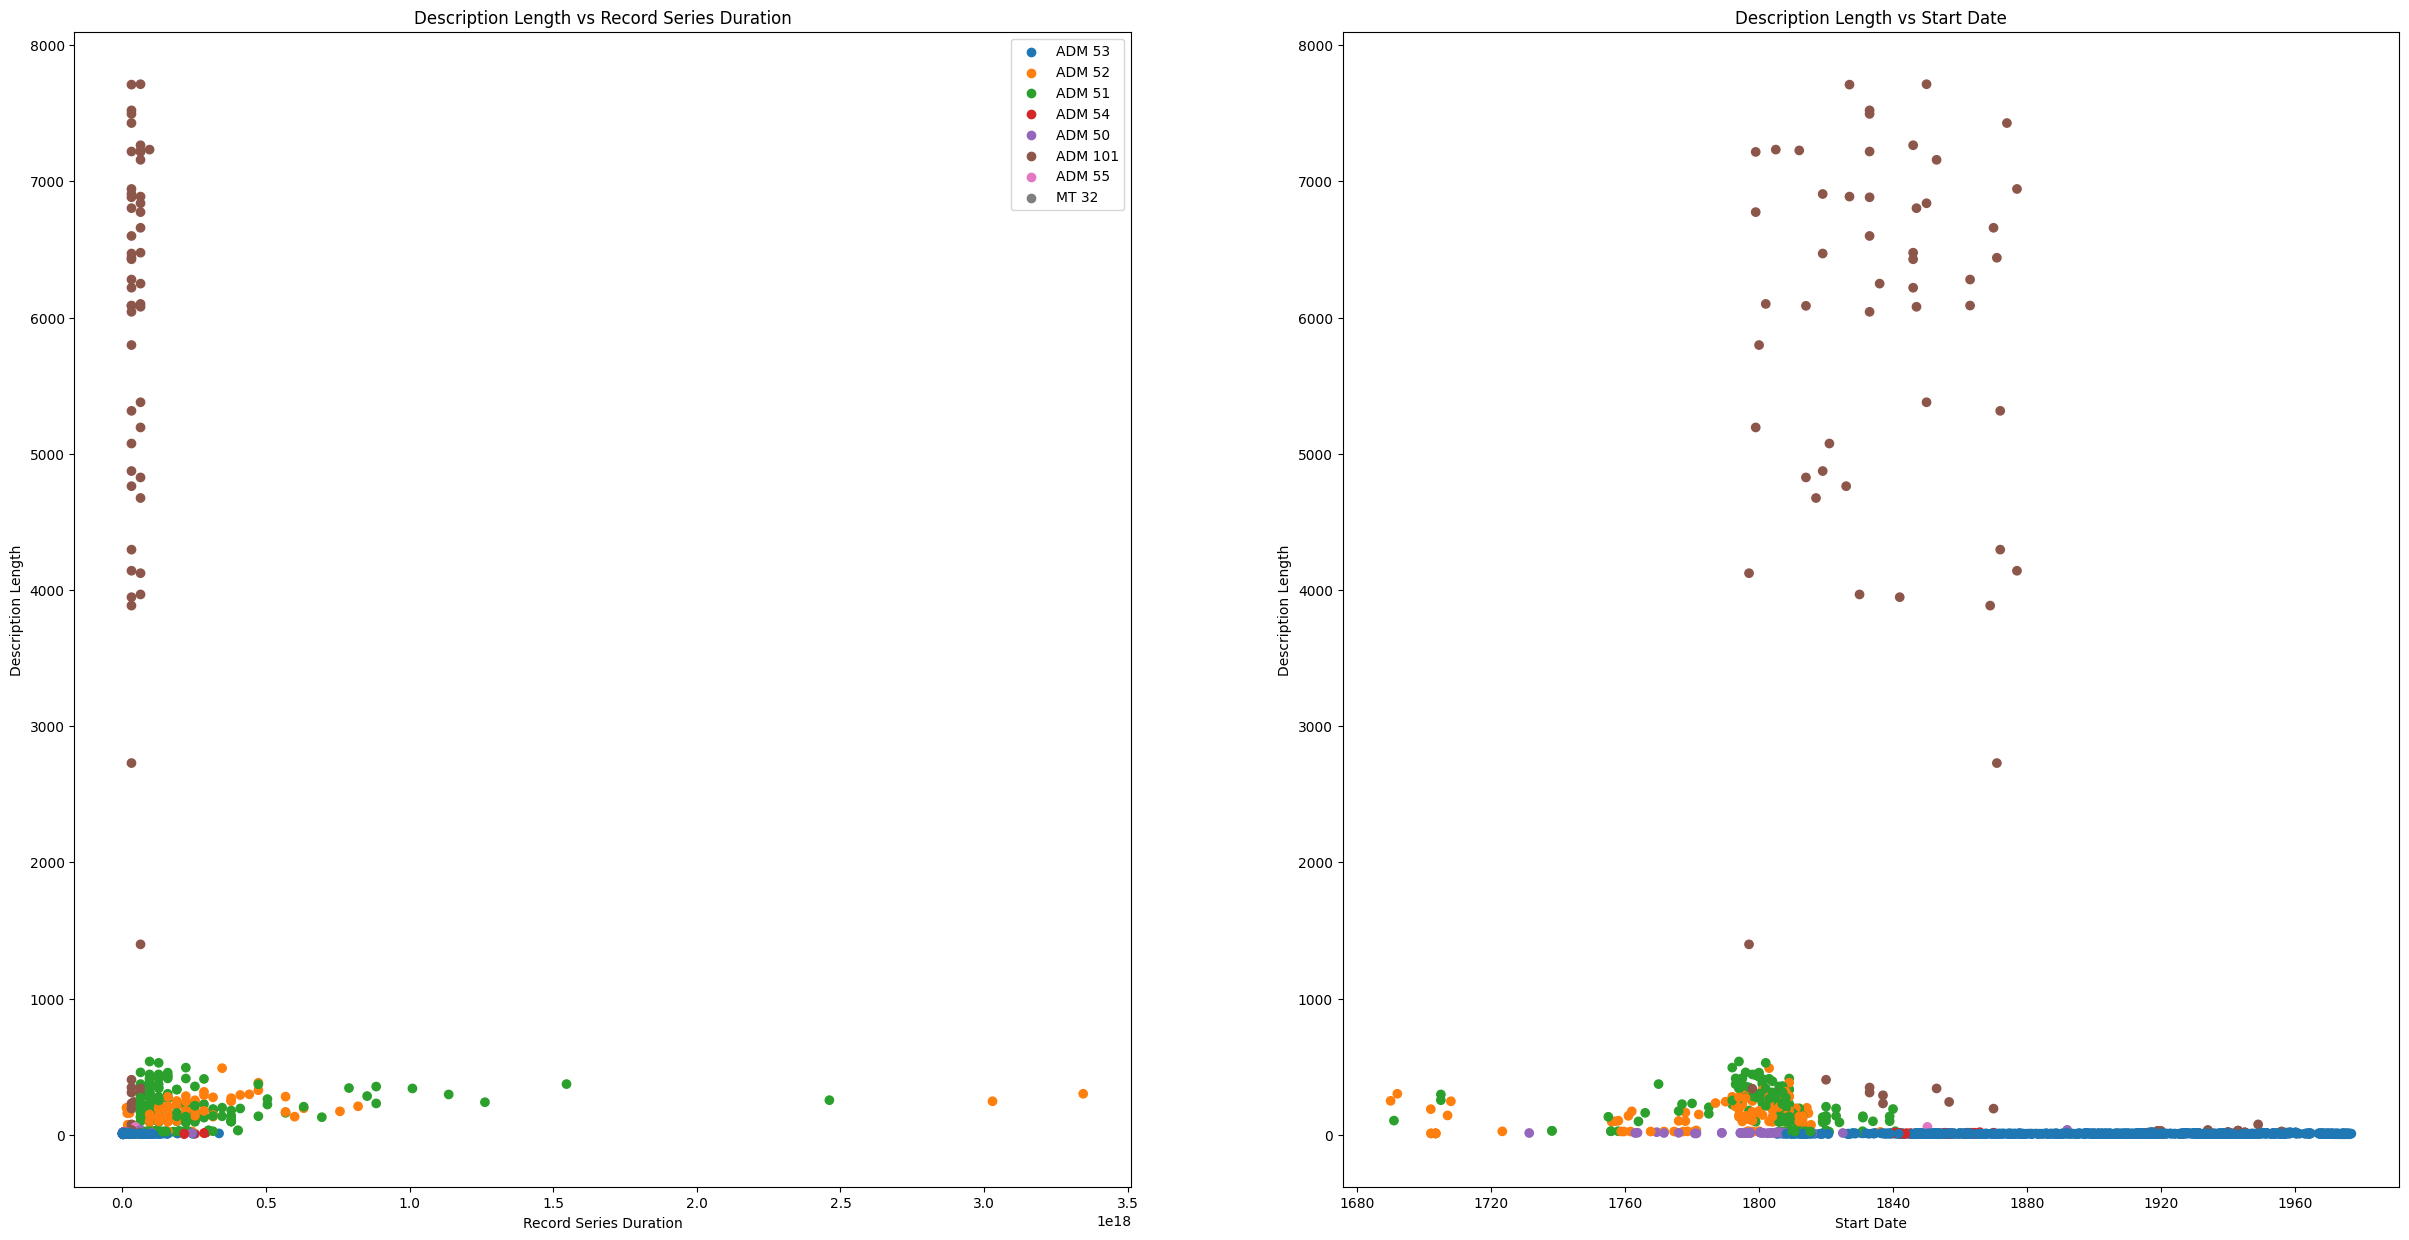

In [32]:
record_series_colour_map = {}

for index, record in enumerate(ship_data_description_set["reference"].unique()):
    record_series_colour_map[record] = f"C{index}"

ship_data_description_set["recordSeries_color"] = ship_data_description_set["reference"].map(record_series_colour_map)

## add the duration of the record series to the dataframe

ship_data_description_set["startDate"] = pandas.to_datetime(ship_data_description_set["startDate"], dayfirst=True)
ship_data_description_set["endDate"] = pandas.to_datetime(ship_data_description_set["endDate"], dayfirst=True)
ship_data_description_set["recordSeries_duration"] = ship_data_description_set["endDate"] - ship_data_description_set["startDate"]

fig_scatter_2, (ax_scatter_2_1, ax_scatter_2_2) = plt.subplots(1, 2, figsize = (30, 15))

ax_scatter_2_1.scatter(ship_data_description_set["recordSeries_duration"], ship_data_description_set["description_length"], color=ship_data_description_set["recordSeries_color"])

ax_scatter_2_1.set_xlabel('Record Series Duration')
ax_scatter_2_1.set_ylabel('Description Length')
ax_scatter_2_1.set_title('Description Length vs Record Series Duration')

for record in ship_data_description_set["reference"].unique():
    ax_scatter_2_1.scatter([], [], label=record, color=record_series_colour_map[record])

ax_scatter_2_1.legend()

ax_scatter_2_2.scatter(ship_data_description_set["startDate"], ship_data_description_set["description_length"], color=ship_data_description_set["recordSeries_color"])

ax_scatter_2_2.set_xlabel('Start Date')
ax_scatter_2_2.set_ylabel('Description Length')
ax_scatter_2_2.set_title('Description Length vs Start Date')

for record in ship_data_description_set["reference"].unique():
    ax_scatter_2_2.scatter([], [], label=record, color=record_series_colour_map[record])

plt.show()

With this double plot of scatter graphs, and changing only the x-axis, we can see a couple of interesting things, highliting the value of visualisations such as this.

- Records in ADM-101 typically have a much longer description than those in the other series. 
- Records in ADM-101 start at about 1800, and end at about 1880. This is particularly interesting as the covering dates for the series [are actually 1785-1963](https://discovery.nationalarchives.gov.uk/details/r/C1810), indicating that something interesting happened in 1880, and the records after that date are different in some way.
- The rest of the records are all more similar lengths - the majority are between 0 and about 600 characters long. 
    - When graphed against record length, record length does not seem to be affected by the duration of the record - the line here is flat. 
    - Agaisnt start date, however, shows that newer records seem to have shorter descriptions. Even ignoring ADM-101, there is a cluster of records with longer descriptions around 1800, and a general trend for older records to have logner descriptions.

One important aspect to keep in mind is the value of tehse graphs. When u